In [54]:
# DATA ANALYSIS LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style,rcParams
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import re
%matplotlib inline
#NLP LIBRARIES

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en_core_web_sm')
#import Twitter and sentiment text libraries
#import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
## machine learning libary
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, StratifiedGroupKFold
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_recall_fscore_support
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
df= pd.read_csv('E_Voting')
df.head()

,Unnamed: 0,Electronic_Voting_Tweets
0,0,RT @DailyMonitor: Makerere votes guild amid ti...
1,1,RT @DailyMonitor: Makerere votes guild amid ti...
2,2,RT @DailyMonitor: Makerere votes guild amid ti...
3,3,RT @DailyMonitor: Makerere votes guild amid ti...
4,4,RT @DailyMonitor: Makerere votes guild amid ti...


In [56]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df.head()

,Electronic_Voting_Tweets
0,RT @DailyMonitor: Makerere votes guild amid ti...
1,RT @DailyMonitor: Makerere votes guild amid ti...
2,RT @DailyMonitor: Makerere votes guild amid ti...
3,RT @DailyMonitor: Makerere votes guild amid ti...
4,RT @DailyMonitor: Makerere votes guild amid ti...


In [57]:
#Return the string obtained by replacing the leftmost non-overlapping occurrences of the pattern in string by the replacement repl. repl can be either a string or a callable; if a string, backslash escapes in it are processed. If it is a callable, it's passed the Match object and must return a replacement string to be used.

In [58]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)# removes @mentions
    text = re.sub(r'#', '', text) # removes the # symbols
    text = re.sub(r'RT[\s]+', '', text)# removes RT
    text = re.sub(r'http?:\/\/\s+', '', text)# removes \n string
    text = re.sub(r'#[A-Za-z0-9]+', '', text)# removes any string with a #
    text = re.sub(':', '', text)# removes \n string
    return text

df['Electronic_Voting_Tweets'] = df['Electronic_Voting_Tweets'].apply(cleanText)
df.head()

,Electronic_Voting_Tweets
0,"Makerere votes guild amid tight security, fre..."
1,"Makerere votes guild amid tight security, fre..."
2,"Makerere votes guild amid tight security, fre..."
3,"Makerere votes guild amid tight security, fre..."
4,"Makerere votes guild amid tight security, fre..."


In [59]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Electronic_Voting_Tweets'].apply(getSubjectivity)
df['Polarity'] = df ['Electronic_Voting_Tweets'].apply(getPolarity)
df.head()

,Electronic_Voting_Tweets,Subjectivity,Polarity
0,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
1,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
2,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
3,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571
4,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571


In [60]:
def getLabel(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Label'] = df['Polarity'].apply(getLabel)
df

,Electronic_Voting_Tweets,Subjectivity,Polarity,Label
0,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
1,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
2,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
3,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
4,"Makerere votes guild amid tight security, fre...",0.285714,-0.178571,Negative
...,...,...,...,...
595,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
596,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
597,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral
598,"2023 Elections 'They stole our BVAS, IREV ide...",0.000000,0.000000,Neutral


In [61]:
df['Label'].value_counts()

Label
Neutral     550
Negative     26
Positive     24
Name: count, dtype: int64

In [62]:
from sklearn.utils import resample
df_neg = df[df['Label'] == 'Negative']
df_pos = df[df['Label'] == 'Positive']
df_neu  = df[df['Label'] == 'Neutral']
df_pos_samp = resample(df_pos, n_samples=550)
df_neg_samp = resample(df_neg, n_samples=550)
df = pd.concat([df_neu,df_pos_samp,df_neg_samp])
df = df.sample(frac=1)
df['Label'].value_counts()

Label
Positive    550
Neutral     550
Negative    550
Name: count, dtype: int64

In [63]:
from sklearn.pipeline import Pipeline
clf1 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',LGBMClassifier())])
clf2 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',XGBClassifier())])
clf3 = Pipeline([('Vectorizer', CountVectorizer()),('Transformer',TfidfTransformer()),('Model',RandomForestClassifier())])

In [64]:
df['Label'] = df['Label'].map({'Positive':0, 'Neutral':1, 'Negative':2})

In [65]:
x = df.Electronic_Voting_Tweets
y = df['Label']
xtrain,xtext,ytrain,ytext = train_test_split(x,y, test_size=0.2)

In [66]:
clf1.fit(xtrain, ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', LGBMClassifier())])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99       100
           2       1.00      1.00      1.00       108

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



<Axes: >

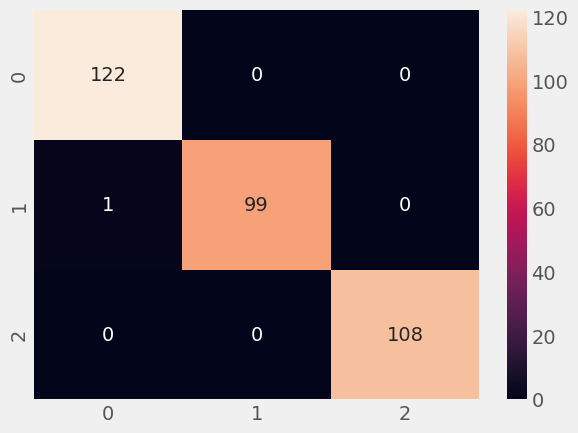

In [67]:
pred1 = clf1.predict(xtext)
print(classification_report(ytext,pred1))
cm = confusion_matrix(ytext,pred1)
sns.heatmap(cm, annot = True, fmt = '0.5g')

In [68]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99       100
           2       1.00      1.00      1.00       108

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



<Axes: >

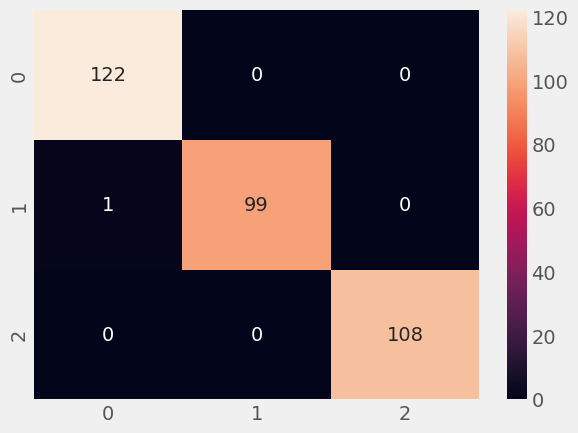

In [69]:
pred2 = clf2.predict(xtext)
print(classification_report(ytext,pred2))
cm = confusion_matrix(ytext,pred2)
sns.heatmap(cm, annot = True, fmt = '0.5g')

In [70]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.98       100
           2       0.99      1.00      1.00       108

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



<Axes: >

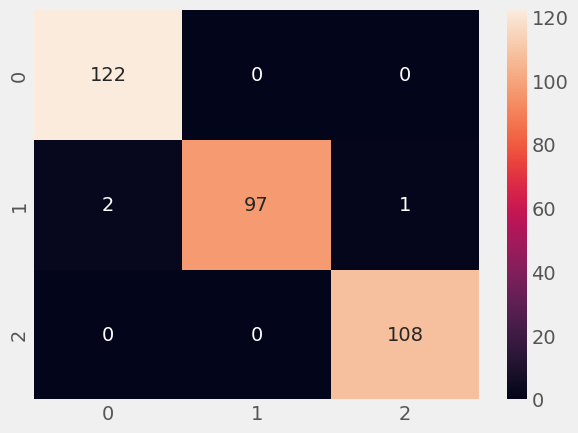

In [71]:
pred3 = clf3.predict(xtext)
print(classification_report(ytext,pred3))
cm = confusion_matrix(ytext,pred3)
sns.heatmap(cm, annot = True, fmt = '0.5g')